# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

640

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty city list
city_list = []

# Initialize values
set_count = 1 
record_count = 1

# Start the loop
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the lat, lng, max temp, humidity, cloudiness, wind speed, country, date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humd = city_weather["main"]["humidity"]
        city_cloud = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_list.append({'City':city,
                          'Lat': city_lat, 
                          'Lng': city_lng,
                          'Max Temp': city_temp, 
                          'Humidity': city_humd,
                          'Cloudiness': city_cloud, 
                          'Wind Speed': city_wind, 
                          'Country': city_country,
                          'Date': city_date
        })
    except:
        print("City not found. Skipping...")
        pass
        
print('------------------------')
print('Data Retrieval Complete ')
print('------------------------')

Processing record 1 of set 1 | beloha
Processing record 2 of set 1 | albany
Processing record 3 of set 1 | bodden town
Processing record 4 of set 1 | saldanha
Processing record 5 of set 1 | valdivia
Processing record 6 of set 1 | victoria
Processing record 7 of set 1 | atuona
Processing record 8 of set 1 | bredasdorp
Processing record 9 of set 1 | matagami
Processing record 10 of set 1 | airai
Processing record 11 of set 1 | avarua
Processing record 12 of set 1 | wad madani
Processing record 13 of set 1 | duxbury
Processing record 14 of set 1 | new norfolk
Processing record 15 of set 1 | torbay
Processing record 16 of set 1 | chuy
Processing record 17 of set 1 | kahului
Processing record 18 of set 1 | hobart
Processing record 19 of set 1 | kandrian
Processing record 20 of set 1 | arman
Processing record 21 of set 1 | yeppoon
Processing record 22 of set 1 | namatanai
Processing record 23 of set 1 | rikitea
Processing record 24 of set 1 | puerto ayora
Processing record 25 of set 1 | vain

City not found. Skipping...
Processing record 41 of set 4 | ossora
Processing record 42 of set 4 | bonavista
Processing record 43 of set 4 | tiksi
Processing record 44 of set 4 | lavrentiya
Processing record 45 of set 4 | lagoa
Processing record 46 of set 4 | kortkeros
Processing record 47 of set 4 | oktyabrskiy
Processing record 48 of set 4 | aklavik
Processing record 49 of set 4 | clyde river
Processing record 0 of set 5 | port blair
Processing record 1 of set 5 | medea
Processing record 2 of set 5 | elko
Processing record 3 of set 5 | saskylakh
Processing record 4 of set 5 | constitucion
Processing record 5 of set 5 | longyearbyen
Processing record 6 of set 5 | yar-sale
Processing record 7 of set 5 | willowmore
Processing record 8 of set 5 | jamestown
Processing record 9 of set 5 | ilulissat
Processing record 10 of set 5 | jieshi
Processing record 11 of set 5 | cartagena del chaira
Processing record 12 of set 5 | barrow
Processing record 13 of set 5 | cochrane
Processing record 14 o

Processing record 32 of set 8 | sabha
Processing record 33 of set 8 | makakilo city
Processing record 34 of set 8 | aborlan
Processing record 35 of set 8 | kalabagh
Processing record 36 of set 8 | fartura
Processing record 37 of set 8 | paragominas
Processing record 38 of set 8 | rio grande
Processing record 39 of set 8 | paamiut
Processing record 40 of set 8 | qinzhou
Processing record 41 of set 8 | taft
Processing record 42 of set 8 | alice springs
Processing record 43 of set 8 | coahuayana
Processing record 44 of set 8 | hambantota
Processing record 45 of set 8 | grand river south east
City not found. Skipping...
Processing record 46 of set 8 | champasak
Processing record 47 of set 8 | broome
Processing record 48 of set 8 | vostok
Processing record 49 of set 8 | umzimvubu
City not found. Skipping...
Processing record 0 of set 9 | weligama
Processing record 1 of set 9 | canutama
Processing record 2 of set 9 | muroto
Processing record 3 of set 9 | kruisfontein
Processing record 4 of s

Processing record 20 of set 12 | college
Processing record 21 of set 12 | moose factory
Processing record 22 of set 12 | bolungarvik
City not found. Skipping...
Processing record 23 of set 12 | olean
Processing record 24 of set 12 | kendal
Processing record 25 of set 12 | gizo
Processing record 26 of set 12 | chimbote
Processing record 27 of set 12 | bull savanna
Processing record 28 of set 12 | petrolandia
City not found. Skipping...
Processing record 29 of set 12 | bulgan
Processing record 30 of set 12 | marawi
Processing record 31 of set 12 | kambove
Processing record 32 of set 12 | galgani
City not found. Skipping...
Processing record 33 of set 12 | pochutla
Processing record 34 of set 12 | hanzhong
Processing record 35 of set 12 | mandalgovi
Processing record 36 of set 12 | aksu
Processing record 37 of set 12 | kuching
Processing record 38 of set 12 | weyburn
Processing record 39 of set 12 | nichinan
Processing record 40 of set 12 | heanor
Processing record 41 of set 12 | haifa
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list_df = pd.DataFrame(city_list)
city_list_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beloha,-25.1667,45.0500,74.28,94,37,7.14,MG,1610579184
1,albany,42.6001,-73.9662,35.01,68,99,2.62,US,1610579184
2,bodden town,19.2833,-81.2500,81.00,78,20,4.61,KY,1610579184
3,saldanha,-33.0117,17.9442,70.57,77,0,6.64,ZA,1610579184
4,valdivia,-39.8142,-73.2459,66.20,55,3,8.05,CL,1610579185
5,victoria,22.2855,114.1577,55.00,52,0,7.83,HK,1610579185
6,atuona,-9.8000,-139.0333,77.90,76,60,14.05,PF,1610579185
7,bredasdorp,-34.5322,20.0403,71.01,83,98,10.00,ZA,1610579186
8,matagami,49.7502,-77.6328,28.40,100,90,3.44,CA,1610579186
9,airai,-8.9266,125.4092,66.04,98,98,1.25,TL,1610579187


In [5]:
city_list_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.866828,24.103703,48.640948,76.098139,53.429780,7.982437,1.610579e+09
std,33.682618,90.868194,32.789434,17.996907,39.928938,5.683945,7.979339e+01
min,-54.800000,-175.200000,-46.550000,14.000000,0.000000,0.160000,1.610579e+09
25%,-8.130850,-53.568800,30.200000,69.000000,7.500000,3.440000,1.610579e+09
50%,21.950000,29.086400,61.200000,80.000000,60.000000,6.910000,1.610579e+09
75%,49.314450,105.541650,75.560000,89.000000,95.000000,11.300000,1.610579e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,32.370000,1.610579e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.
city_high_humid = city_list_df[city_list_df['Humidity'] > 100].index
city_high_humid

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_list_df.drop(city_high_humid, inplace=False)
clean_city_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beloha,-25.1667,45.0500,74.28,94,37,7.14,MG,1610579184
1,albany,42.6001,-73.9662,35.01,68,99,2.62,US,1610579184
2,bodden town,19.2833,-81.2500,81.00,78,20,4.61,KY,1610579184
3,saldanha,-33.0117,17.9442,70.57,77,0,6.64,ZA,1610579184
4,valdivia,-39.8142,-73.2459,66.20,55,3,8.05,CL,1610579185
5,victoria,22.2855,114.1577,55.00,52,0,7.83,HK,1610579185
6,atuona,-9.8000,-139.0333,77.90,76,60,14.05,PF,1610579185
7,bredasdorp,-34.5322,20.0403,71.01,83,98,10.00,ZA,1610579186
8,matagami,49.7502,-77.6328,28.40,100,90,3.44,CA,1610579186
9,airai,-8.9266,125.4092,66.04,98,98,1.25,TL,1610579187


In [8]:
clean_city_data.to_csv('clean city data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

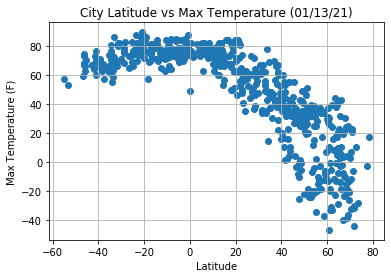

In [31]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title('City Latitude vs Max Temperature (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output_data/figure1.png')
plt.show()

## Latitude vs. Humidity Plot

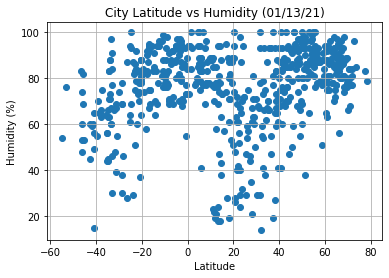

In [32]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title('City Latitude vs Humidity (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output_data/figure2.png')
plt.show()

## Latitude vs. Cloudiness Plot

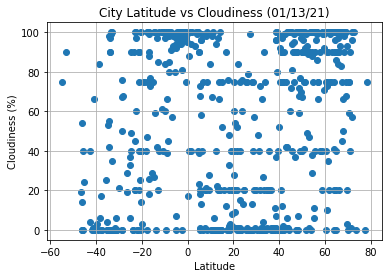

In [33]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title('City Latitude vs Cloudiness (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output_data/figure3.png')
plt.show()

## Latitude vs. Wind Speed Plot

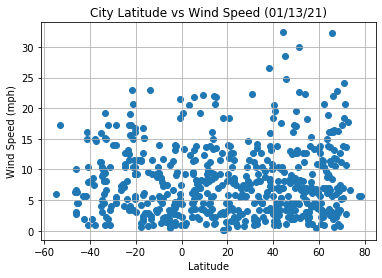

In [34]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title('City Latitude vs Wind Speed (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/figure4.png')
plt.show()

## Linear Regression

The r-value is: 0.6272946863823227


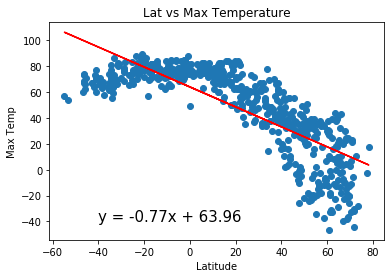

In [35]:
# y = ax + b (R2: the percentage of the data are explained by the function)
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40,-40), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Lat vs Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure5.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2349788126326879


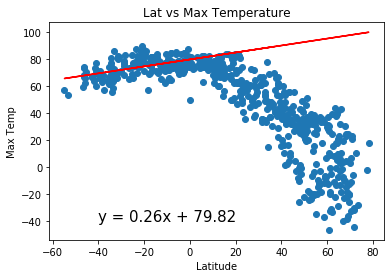

In [36]:
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']
northern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, -40), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Lat vs Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure6.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2349788126326879


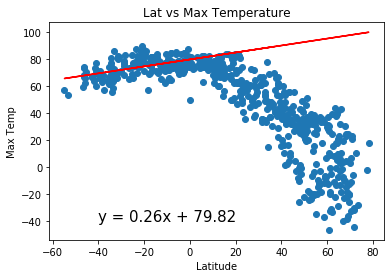

In [37]:
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']
southern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, -40), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Lat vs Max Temperature")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure7.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27486545580910876


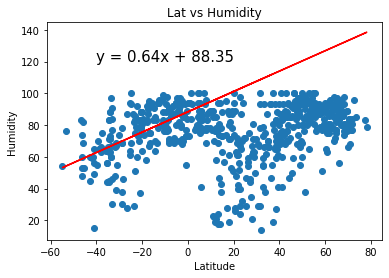

In [38]:
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
northern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 120), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Lat vs Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure8.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27486545580910876


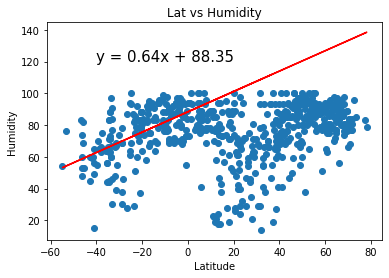

In [39]:
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
southern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 120), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Lat vs Humidity")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure9.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3257905779829162


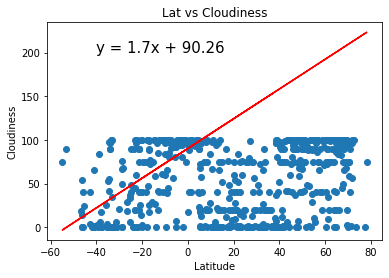

In [40]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
northern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 200), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Lat vs Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure10.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3257905779829162


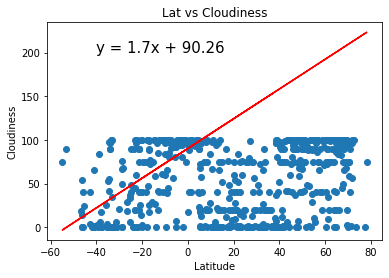

In [41]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
southern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 200), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Lat vs Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure11.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02226571420656278


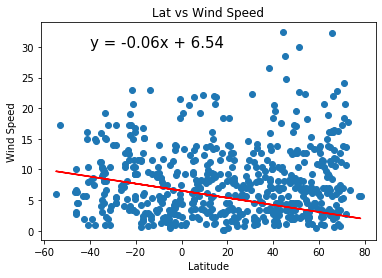

In [42]:
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
northern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Lat vs Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure12.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02226571420656278


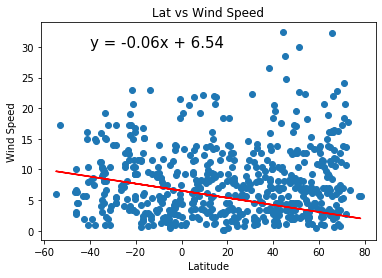

In [43]:
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
southern_hemi_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40, 30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Lat vs Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure13.png')
plt.show()